In [1]:
from ds_utils.imports import *

np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using Theano backend.


In [2]:
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape 

(60000, 28, 28)

In [4]:
X_train[0][0].shape

(28,)

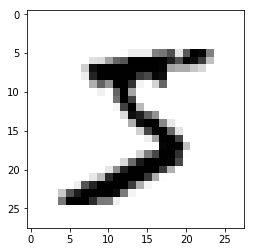

In [5]:
plt.imshow(X_train[0], cmap=plt.cm.gray_r)

In [6]:
y_train[0]

5

In [7]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [8]:
X_train.shape

(60000, 1, 28, 28)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

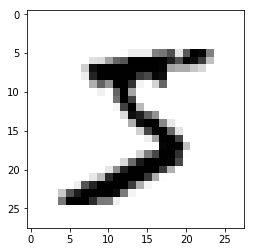

In [10]:
plt.imshow(X_train[0][0], cmap=plt.cm.gray_r)

In [11]:
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train.shape

(60000, 10)

In [13]:
Y_train[:2]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
# 7. Define model architecture
model = Sequential()

model.add(
    Convolution2D(
        32, (3, 3), activation='relu', input_shape=(1, 28, 28)))

In [15]:
model.output_shape

(None, 32, 26, 26)

In [16]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 24, 24)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [ ]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 9. Fit model on training data
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=2, verbose=1)

/opt/conda/lib/python3.6/site-packages/Keras-2.0.0-py3.6.egg/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/2
48864/60000 [=======================>......] - ETA: 76s - loss: 0.2279 - acc: 0.9298 

In [ ]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
score

References
- https://elitedatascience.com/keras-tutorial-deep-learning-in-python